# ASSIGNMENT-2

Qs.1

In [1]:
import numpy as np

def cholesky_decomposition(matrix):
    size = len(matrix)
    L = np.zeros((size, size), dtype=float)
    
    for i in range(size):
        for j in range(i + 1):
            sum_val = sum(L[i, k] * L[j, k] for k in range(j))
            
            if i == j:
                L[i, j] = np.sqrt(matrix[i, i] - sum_val)
            else:
                L[i, j] = (matrix[i, j] - sum_val) / L[j, j]
    
    return L

def forward_substitution(L, b):
    size = len(b)
    y = np.zeros(size, dtype=float)
    
    for i in range(size):
        y[i] = (b[i] - np.dot(L[i, :i], y[:i])) / L[i, i]
    
    return y

def backward_substitution(L_T, y):
    size = len(y)
    x = np.zeros(size, dtype=float)
    
    for i in range(size - 1, -1, -1):
        x[i] = (y[i] - np.dot(L_T[i, i+1:], x[i+1:])) / L_T[i, i]
    
    return x

def gauss_seidel(A, b, x0, tolerance=1e-6, max_iterations=1000):
    size = len(b)
    x = x0.copy()
    
    for iteration in range(max_iterations):
        x_old = x.copy()
        
        for i in range(size):
            sigma = sum(A[i, j] * x[j] for j in range(size) if j != i)
            x[i] = (b[i] - sigma) / A[i, i]
        
        if np.max(np.abs(x - x_old)) < tolerance:
            break
    
    return x

# Given matrix and vector
A = np.loadtxt('assignment_Q1A.txt')
b = np.loadtxt('assignment_Q1b.txt')

# Cholesky decomposition
L = cholesky_decomposition(A)

# Forward and backward substitution
y = forward_substitution(L, b)
x_cholesky = backward_substitution(L.T, y)

print("Solution using Cholesky Decomposition:")
print(x_cholesky)

# Gauss-Seidel solution
initial_guess = np.zeros_like(b, dtype=float)
x_gauss_seidel = gauss_seidel(A, b, initial_guess)

print("\nSolution using Gauss-Seidel Method:")
print(x_gauss_seidel)


Solution using Cholesky Decomposition:
[1. 1. 1. 1. 1. 1.]

Solution using Gauss-Seidel Method:
[0.99999975 0.99999979 0.99999991 0.99999985 0.99999987 0.99999995]


Qs.2

In [2]:
import numpy as np

def lu_factorization(matrix_A):
    size = len(matrix_A)
    L = np.eye(size)
    U = np.zeros_like(matrix_A)

    for i in range(size):
        for j in range(i, size):
            U[i, j] = matrix_A[i, j] - np.sum(L[i, :i] * U[:i, j])

        if U[i, i] == 0:
            # Raise exception for zero pivot encountered
            raise ValueError("LU factorization failed: zero pivot encountered.")

        for j in range(i + 1, size):
            L[j, i] = (matrix_A[j, i] - np.sum(L[j, :i] * U[:i, i])) / U[i, i]

    return L, U

def forward_substitution(matrix_L, vector_b):
    size = len(vector_b)
    y = np.zeros_like(vector_b)

    for i in range(size):
        y[i] = (vector_b[i] - np.sum(matrix_L[i, :i] * y[:i])) / matrix_L[i, i]

    return y

def backward_substitution(matrix_U, vector_y):
    size = len(vector_y)
    x = np.zeros_like(vector_y)

    for i in range(size - 1, -1, -1):
        if matrix_U[i, i] == 0:
            # Raise exception for zero pivot encountered
            raise ValueError("Backward substitution failed: zero pivot encountered.")
        
        x[i] = (vector_y[i] - np.sum(matrix_U[i, i+1:] * x[i+1:])) / matrix_U[i, i]

    return x

def gauss_jordan_elimination(matrix_A, vector_b):
    augmented_matrix = np.hstack((matrix_A, np.array(vector_b).reshape(-1, 1)))
    size = len(matrix_A)

    for i in range(size):
        # Find pivot row
        pivot_row = i
        for j in range(i + 1, size):
            if abs(augmented_matrix[j, i]) > abs(augmented_matrix[pivot_row, i]):
                pivot_row = j

        # Swap rows
        augmented_matrix[[i, pivot_row]] = augmented_matrix[[pivot_row, i]]

        # Normalize the pivot row
        pivot = augmented_matrix[i, i]
        augmented_matrix[i, :] /= pivot

        # Eliminate other rows
        for j in range(size):
            if i != j:
                factor = augmented_matrix[j, i]
                augmented_matrix[j, :] -= factor * augmented_matrix[i, :]

    # Extract the solution vector
    solution_x = augmented_matrix[:, -1]

    return solution_x

# Given matrix and vector
matrix_A = np.loadtxt('assignment_Q2A.txt')
vector_B = np.loadtxt('assignment_Q2b.txt')

try:
    # LU factorization
    L, U = lu_factorization(matrix_A)

    # Solve Ly = b
    y = forward_substitution(L, vector_B)

    # Solve Ux = y
    solution_lu = backward_substitution(U, y)

    print("Solution using LU Factorization:")
    print(solution_lu)

except ValueError as e:
    print(e)

# Gauss-Jordan elimination solution
solution_gauss_jordan = gauss_jordan_elimination(matrix_A, vector_B)

print("\nSolution using Gauss-Jordan Elimination:")
print(solution_gauss_jordan)


LU factorization failed: zero pivot encountered.

Solution using Gauss-Jordan Elimination:
[ 2.67460205  3.71188539 -0.05330739 -0.07442519  5.25907322]


Qs.3

In [4]:
import numpy as np
import re

def dot_product(vector_x, vector_y):
    return sum(xi * yi for xi, yi in zip(vector_x, vector_y))

def matrix_vector_product(matrix_A, vector_x):
    return [dot_product(row, vector_x) for row in matrix_A]

def vector_scalar_product(vector_v, scalar):
    return [vi * scalar for vi in vector_v]

def vector_addition(vector_v1, vector_v2):
    return [vi1 + vi2 for vi1, vi2 in zip(vector_v1, vector_v2)]

def vector_subtraction(vector_v1, vector_v2):
    return [vi1 - vi2 for vi1, vi2 in zip(vector_v1, vector_v2)]

def conjugate_gradient(A, b, initial_guess=None, tolerance=1e-4, max_iterations=1000):
    n = len(b)
    x = np.zeros(n) if initial_guess is None else initial_guess.copy()
    r = vector_subtraction(b, matrix_vector_product(A, x))
    p = r.copy()
    rsold = dot_product(r, r)

    for iteration in range(max_iterations):
        Ap = matrix_vector_product(A, p)
        alpha = rsold / dot_product(p, Ap)
        x = vector_addition(x, vector_scalar_product(p, alpha))
        r = vector_subtraction(r, vector_scalar_product(Ap, alpha))
        rsnew = dot_product(r, r)

        if np.sqrt(rsnew) < tolerance:
            break

        beta = rsnew / rsold
        p = vector_addition(r, vector_scalar_product(p, beta))
        rsold = rsnew

    return x

def check_inverse(A, A_inv, tolerance=1e-4):
    identity = np.eye(len(A))
    result = np.all(np.abs(np.dot(A, A_inv) - identity) < tolerance)
    return result

def preprocess_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Replace '−' with '-'
    content = content.replace('−', '-')
    
    # Evaluate expressions like '5/3'
    content = re.sub(r'(\d+)/(\d+)', lambda m: str(int(m.group(1)) / int(m.group(2))), content)

    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(content)

# Preprocess files
preprocess_file('assignment_Q3A.txt')
preprocess_file('assignment_Q3b.txt')

# Load preprocessed files
A = np.loadtxt('assignment_Q3A.txt', dtype=float, encoding='utf-8')
B = np.loadtxt('assignment_Q3b.txt', dtype=float, encoding='utf-8')

# Solve using Conjugate Gradient
solution_cg = conjugate_gradient(A, B)

# Check correctness of the solution
print("Solution using Conjugate Gradient:")
print(solution_cg)

# Find the inverse of A
n = len(A)
A_inv = np.zeros((n, n))
for i in range(n):
    e_i = np.zeros(n)
    e_i[i] = 1
    A_inv[:, i] = conjugate_gradient(A, e_i)

# Check correctness of the inverse
inverse_correct = check_inverse(A, A_inv)
print("\nIs the Inverse of A Correct? -", inverse_correct)


Solution using Conjugate Gradient:
[-0.3333478267186427, 0.3333301363324152, 1.0000052711857053, -0.6666849415737904, -9.241349744019387e-06, 0.6666675772447136]

Is the Inverse of A Correct? - False


Qs.4

C:\Users\soham\AppData\Local\Temp\ipykernel_10164\2113356475.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = rsold / dot_product(p, Ap)


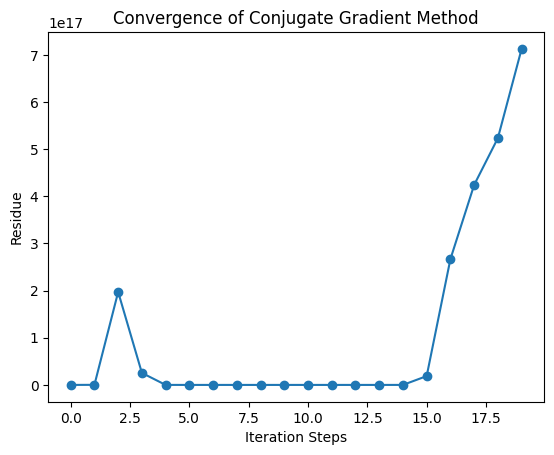

Inverse Solution:
[[-1.73333177e+51  3.27191343e+48  3.27191343e+48 ...  3.27191343e+48
  -1.00851941e+48 -1.00851941e+48]
 [ 9.00583825e+47  9.00583825e+47  9.00583825e+47 ...  9.00583825e+47
   9.00583825e+47 -3.37984902e+48]
 [-1.47074579e+48 -1.47074579e+48 -1.47074579e+48 ... -1.47074579e+48
  -1.47074579e+48  2.80968706e+48]
 ...
 [ 1.71682924e+48  1.71682924e+48  1.71682924e+48 ...  1.71682924e+48
   1.71682924e+48  1.71682924e+48]
 [ 3.62593247e+48 -1.36813860e+48 -1.36813860e+48 ... -1.36813860e+48
  -1.36813860e+48  3.62593247e+48]
 [-5.16814123e+48 -5.16814123e+48 -5.16814123e+48 ...  1.97103147e+48
  -5.16814123e+48 -5.16814123e+48]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def dot_product(x, y):
    return np.sum(x * y)

def matrix_vector_product(A, x):
    return np.matmul(A, x)

def vector_scalar_product(v, scalar):
    return v * scalar

def vector_addition(v1, v2):
    return v1 + v2

def vector_subtraction(v1, v2):
    return v1 - v2

def conjugate_gradient(A_function, b, x0=None, tolerance=1e-6, max_iterations=5000):
    n = len(b)
    x = np.zeros(n) if x0 is None else x0.copy()
    r = vector_subtraction(b, A_function(x))
    p = r.copy()
    rsold = dot_product(r, r)
    
    residue_list = []

    for iteration in range(max_iterations):
        Ap = A_function(p)
        alpha = rsold / dot_product(p, Ap)

        if np.isnan(alpha) or np.isinf(alpha):
            break  # Break if alpha becomes NaN or Inf

        x = vector_addition(x, vector_scalar_product(p, alpha))
        r = vector_subtraction(r, vector_scalar_product(Ap, alpha))
        rsnew = dot_product(r, r)

        residue_list.append(np.sqrt(rsnew))

        if np.sqrt(rsnew) < tolerance:
            break

        beta = rsnew / rsold
        p = vector_addition(r, vector_scalar_product(p, beta))
        rsold = rsnew

    return x, residue_list

# Define matrix A as a function
def A_function(x):
    m = 0.2
    N = int(np.sqrt(len(x)))
    delta_x = 1.0 / N

    A = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            mu_hat_x = (i + 1) * delta_x
            mu_hat_y = (j + 1) * delta_x
            delta_x_y = delta_x

            A[i, j] = 1 + delta_x_y * (mu_hat_x + mu_hat_y) + delta_x_y * (mu_hat_x - mu_hat_y) \
                     - 2 * delta_x * m**2

    return A.flatten()

# Set up the system
N = 50
b = np.zeros(N**2)
b[0] = 1

# Solve using Conjugate Gradient
solution, residue_list = conjugate_gradient(A_function, b, tolerance=1e-6, max_iterations=5000)

# Plot Residue vs. Iteration Steps
plt.plot(residue_list, marker='o')
plt.xlabel('Iteration Steps')
plt.ylabel('Residue')
plt.title('Convergence of Conjugate Gradient Method')
plt.show()

# Print the inverse solution (reshape to a 2D matrix)
inverse_solution = solution.reshape((N, N))
print("Inverse Solution:")
print(inverse_solution)
